In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
from sklearn.model_selection import train_test_split

X,y=make_blobs(n_samples=100,centers=6,random_state=42)

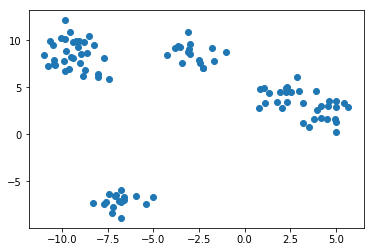

In [5]:
plt.scatter(X[:, 0],X[:, 1])

In [8]:
class Cluster:
    def __init__(self,name,center):
        self.name=name
        self.center=center
        self.points=[]
        
    def distance(self,point):
        return np.sqrt(np.sum((self.center-point)**2))
    
    def relocate(self):
        self.center=np.mean(self.points, axis=0)
    
    
    
class KMeans_Custom:
    def __init__(self,n_clusters=5,n_init=10,max_iters=300):
        self.n_clusters=n_clusters
        self.n_init=n_init
        self.max_iters=max_iters
    
    def fit(self,X):
        timeline_infos=[]
        for timeline in range(self.n_init):
            clusters=[]
            for i in range(self.n_clusters):
                cluster=Cluster(i,random.choice(X))
                clusters.append(cluster)

            for i in range(self.max_iters):
                labels=[]   #stores votes of everyone
                for point in X:
                    distances=[]
                    for cluster in clusters:
                        distance=cluster.distance(point)
                        distances.append(distance)
                    selected=clusters[np.argmin(distances)]   
                    labels.append(selected.name)
                    selected.points.append(point)
                for cluster in clusters:
                    cluster.relocate()
            err=self.error(clusters,X,labels)
            timeline_infos.append([err,clusters,labels])
            
        sorted_infos=sorted(timeline_infos)
        err,clusters,labels=sorted_infos[0]
        self.labels_ =labels
        self.cluster_centers_=np.array([cluster.center for cluster in clusters])
        
    def error(self,clusters,X,labels):
        err=0
        for point,label in zip(X,labels):
            cluster=clusters[label]
            distance=cluster.distance(point)
            err+=distance
        return err

In [11]:
model=KMeans_Custom(n_clusters=6)
model.fit(X)
model.cluster_centers_

array([[ 2.08014933,  4.23864374],
       [ 4.52156803,  2.20772001],
       [-9.56753152,  9.92091181],
       [-9.20471494,  7.35137622],
       [-2.81937737,  8.60427975],
       [-6.84770403, -7.09318466]])

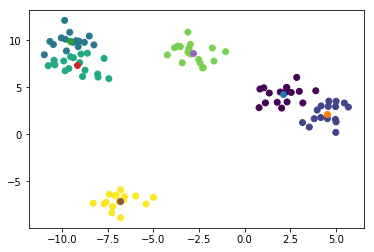

In [12]:

plt.scatter(X[:, 0],X[:, 1], c=model.labels_)
for center in model.cluster_centers_:
    plt.scatter(center[0], center[1])